**Avocado Price Prediction BY:Rifqi Arrayan**

##Data Collecting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado (2).csv


In [ ]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##Explanatory Data Analysis

Melihat deskrpsi pada datanya

In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Melakukan pengecekan apakah terdapat data yang hilang atau tidak

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


##Data prepocessing

Melihat jumlah outlier dalam bentuk visualiasi dengan menggunakan boxplot

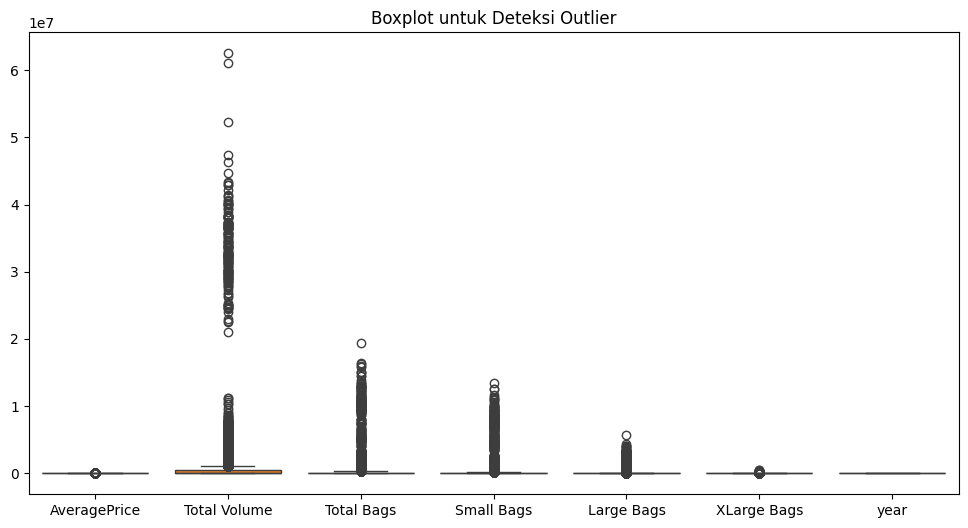

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['AveragePrice', 'Total Volume', 'Total Bags','Small Bags','Large Bags','XLarge Bags','year']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

Melihat jumlah outlier yang ada pada dataset

In [ ]:
# Daftar fitur yang ingin dicek outliernya
columns_to_check = ['AveragePrice', 'Total Volume', 'Total Bags','Small Bags','Large Bags','XLarge Bags','year']

# Menyimpan jumlah outlier
outlier_counts = {}

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menentukan jumlah outlier
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outlier_count

# Menampilkan jumlah outlier
for feature, count in outlier_counts.items():
    print(f"Jumlah outlier pada {feature}: {count}")


Jumlah outlier pada AveragePrice: 209
Jumlah outlier pada Total Volume: 2297
Jumlah outlier pada Total Bags: 2533
Jumlah outlier pada Small Bags: 2407
Jumlah outlier pada Large Bags: 2707
Jumlah outlier pada XLarge Bags: 4014
Jumlah outlier pada year: 0


**Melihat ditribusi data pada beberapa fitur**

Dari Hasil visualiasi di atas mendapatkan insight yaitu:

***Average price :*** terlihat bahwa terdistribusi normal dengan sedikt skew ke kanan yang dapat di artikan harga avocado stabil di harga tertentu dan produk dengan harga tinggi tergolong langka

***Total volume dengan total bags:***Distribusi sangat miring ke kanan (right-skewed).Sebagian besar transaksi melibatkan volume kecil avocado, tapi ada beberapa transaksi atau event tertentu dengan volume luar biasa besar (mungkin event grosir, musim panen besar, atau promosi besar-besaran).

***Small Bags, Large Bags, XLarge Bags:***Small Bags paling sering terjadi dibandingkan Large dan XLarge dan Large Bags dan XLarge Bags lebih jarang, dan hanya sesekali ada transaksi dengan volume besar.dapat saya simpulkan bahwa Konsumen atau pasar lebih sering membeli avokad dalam kemasan kecil. Kemasan besar dan ekstra besar sangat jarang digunakan, mungkin hanya untuk pasar grosir atau industri besar.

***Distribusi year (tahun):***Data terbagi rata pada tahun 2015, 2016, dan 2017 dan data terlihat Jumlah data tiap tahun stabil, sekitar 5500–5800 data per tahun.akan tetapi pada tahun 2018 jumlah data jauh lebih sedikit dibandingkan tahun sebelumnya  

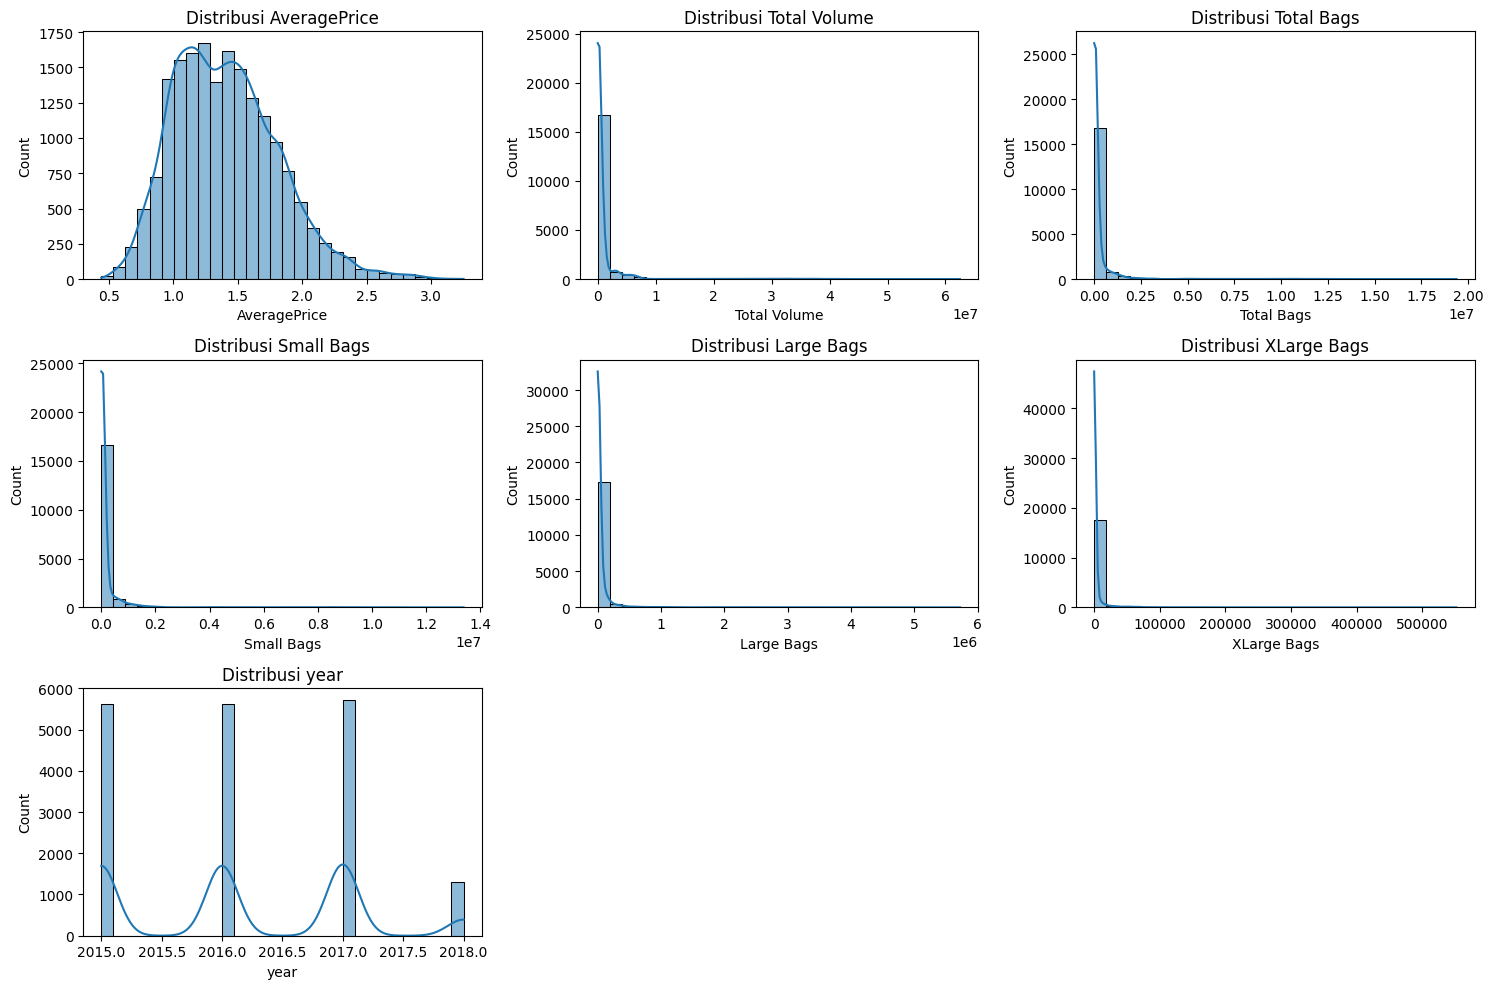

In [ ]:
# ingin melihat distribusi data
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur yang akan dicek distribusinya
columns_to_check = ['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

# Menentukan jumlah baris dan kolom subplot
rows = 3
cols = 3

plt.figure(figsize=(15, 10))  # Ukuran plot
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(rows, cols, i)  # Menyesuaikan dengan jumlah fitur
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')

plt.tight_layout()  # Menghindari tumpang tindih
plt.show()


**Penanganan Outlier dengan winsoring**

Di bawah ini saya melakukan penanganan outlier dengan menggunakan teknik winsoring,dimana teknik winsoring adalah teknik yang mana dapat menangani jumlah outlier yang sangat banyak dengan cara kerja yaitu jika di bawah lower bond akan diganti dengan lower bond dan jika berada di atas upper bond maka akan di ganti dengan upperbond

In [ ]:
import numpy as np

# Daftar fitur yang ingin dicek dan diperbaiki outliernya
columns_to_check = ['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

# Menyimpan jumlah outlier sebelum perbaikan
outlier_counts_before = {}

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier sebelum perbaikan
    outlier_counts_before[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Winsorizing: Mengganti outlier dengan batas IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Mengecek jumlah outlier setelah perbaikan
outlier_counts_after = {}

for col in columns_to_check:
    Q1_new = df[col].quantile(0.25)
    Q3_new = df[col].quantile(0.75)
    IQR_new = Q3_new - Q1_new
    lower_bound_new = Q1_new - 1.5 * IQR_new
    upper_bound_new = Q3_new + 1.5 * IQR_new

    outlier_counts_after[col] = ((df[col] < lower_bound_new) | (df[col] > upper_bound_new)).sum()

# Menampilkan jumlah outlier sebelum dan sesudah perbaikan
print("Jumlah outlier sebelum perbaikan:")
for feature, count in outlier_counts_before.items():
    print(f"Jumlah outlier pada {feature}: {count}")

print("\nJumlah outlier setelah perbaikan:")
for feature, count in outlier_counts_after.items():
    print(f"Jumlah outlier pada {feature}: {count}")


Jumlah outlier sebelum perbaikan:
Jumlah outlier pada AveragePrice: 209
Jumlah outlier pada Total Volume: 2297
Jumlah outlier pada Total Bags: 2533
Jumlah outlier pada Small Bags: 2407
Jumlah outlier pada Large Bags: 2707
Jumlah outlier pada XLarge Bags: 4014
Jumlah outlier pada year: 0

Jumlah outlier setelah perbaikan:
Jumlah outlier pada AveragePrice: 0
Jumlah outlier pada Total Volume: 0
Jumlah outlier pada Total Bags: 0
Jumlah outlier pada Small Bags: 0
Jumlah outlier pada Large Bags: 0
Jumlah outlier pada XLarge Bags: 0
Jumlah outlier pada year: 0


Menghapus data yang tidak di perlukan,kemudian mengubah format date menjadi format datetime serta mengubah variabel kategorikal menjadi numerik dengan menggunakan teknik one hot encoding

In [ ]:
# melakukan encoding data
import pandas as pd

# Salin dataset asli agar tetap memiliki data mentah
df_cleaned = df.copy()

# Menghapus kolom yang tidak diperlukan
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0', '4046', '4225', '4770'])

# Mengubah kolom 'Date' menjadi format datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Ekstraksi fitur waktu dari kolom 'Date'
df_cleaned['month'] = df_cleaned['Date'].dt.month
df_cleaned['day'] = df_cleaned['Date'].dt.day

# Menghapus kolom 'Date' karena sudah diubah menjadi fitur numerik
df_cleaned = df_cleaned.drop(columns=['Date'])

# Mengubah variabel kategorikal menjadi numerik menggunakan one-hot encoding (alasan nya adalah type dan region adalah data kategorikal dan tidak memiliki hubungan)
df_cleaned = pd.get_dummies(df_cleaned, columns=['type', 'region'], drop_first=True)

# Menampilkan hasil transformasi dataset
df_cleaned.head()


,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,type_organic,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015.0,12,27,False,...,False,False,False,False,False,False,False,False,False,False
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015.0,12,20,False,...,False,False,False,False,False,False,False,False,False,False
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,2015.0,12,13,False,...,False,False,False,False,False,False,False,False,False,False
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,2015.0,12,6,False,...,False,False,False,False,False,False,False,False,False,False
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,2015.0,11,29,False,...,False,False,False,False,False,False,False,False,False,False


##Model Training

Membagi 2 dataset yaitu sebagai fitur dan target

In [ ]:
X = df_cleaned.drop(columns=['AveragePrice']) # fitur
y = df_cleaned['AveragePrice'] # target

Melakukan standarisasi dengan menggunakan z score karena distribusi data yang tidak normal

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Mempersiapkan Lima model yang berbeda agar nanti bisa dipakai untuk membandingkan performa Lima model ini di tugas prediksi angka

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Mendeklarikan 5 model yang dapat digunakan
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

Melatih Lima model tersebut,mengukur performa Lima model tersebut, dan menyimpan hasilnya agar nantinya bisa dibandingkan.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 14599, number of used features: 62
[LightGBM] [Info] Start training from score 1.402426


**Melakukan stacking**

yaitu menggabungkan 3 model yaitu random forest(rf),xgboost(xgb),dan LightGBM(lgbm) hasil ketiga model tersebut digunakan sebagai fitur baru yang diterima oleh gradient boosting sebagai meta learner

**Alasan mengapa hanya memakai 3 model saja:**

Random forest:lebih stabil, mengurangi overfitting dengan cara menggabungkan banyak pohon keputusan kemudian XGBoost:sangat efektif dalam meminimalkan kesalahan pada iterasi berturut-turut dan mengoptimalkan fungsi loss serta LightGBM lebih cepat dan efisien dalam menangani dataset besar, namun tetap memberikan hasil yang sangat baik dalam masalah regresi dan klasifikasi.


In [ ]:
from sklearn.ensemble import StackingRegressor

# Stacking Model
# menggunakan 3 model sebagai base learner (random forest(rf),xgboost(xgb),dan LightGBM(lgbm))
stacking_model = StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
], final_estimator=GradientBoostingRegressor())

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
results["Stacking"] = {
    "MSE": mean_squared_error(y_test, y_pred_stack),
    "MAE": mean_absolute_error(y_test, y_pred_stack),
    "R2 Score": r2_score(y_test, y_pred_stack)
}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 14599, number of used features: 62
[LightGBM] [Info] Start training from score 1.402426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 11679, number of used features: 62
[LightGBM] [Info] Start training from score 1.401871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

**Tujuan:**

Mencari kombinasi parameter terbaik untuk Random Forest memakai Grid Search dikarenakan ketiga model seperti Random Forest, XGBoost, LightGBM memiliki banyak hyperparameter yang memengaruhi performa.jika kita menggunakan nilai default, model mungkin tidak bekerja optimal dengan menggunakan hyperparameter tuning dapat menemukan kombinasi terbaik
untuk meningkatkan akurasi.

Dimana jumlah pohon yang dicoba yaitu 50,100,dan 150 dengan kedalam pohon yaitu 10,20,dan 30

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning (Random Forest)
param_grid = {"n_estimators": [50, 100, 150], "max_depth": [10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

**Tujuan:**

Mencari parameter terbaik dengan menggunakan bayesian Optimization lewat BayesSearchCV tapi kali ini tidak menggunakan grid search dengan men-tuning parameter XGBoost dengan cara yang lebih cerdas dan hemat waktu dibanding Grid Search.

**Catatan:**

Disini saya menggunakan bayesian dengan menghiraukan grid search dikarenakan bayesian lebih pintar,efisen,serta lebih cepat dalam menemukan parameter terbaik tanpa perlu cek semua kemungkinan.

In [ ]:
from skopt import BayesSearchCV

# Bayesian Optimization (XGBoost)
bayes_search = BayesSearchCV(
    XGBRegressor(random_state=42),
    {"n_estimators": (50, 200), "max_depth": (3, 10), "learning_rate": (0.01, 0.3)},
    n_iter=10,
    cv=3,
    scoring="r2",
    n_jobs=-1
)
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
              n_iter=10, n_jobs=-1, scoring='r2',
              search_spaces={'learning_rate': (0.01, 0.3), 'max_depth': (3, 10),
                             'n_estimators': (50, 200)})

##Model Evaluation

**Tujuan:**

menampilkan hasil terbaik dari proses Bayesian Optimization.

Hasilnya adalah learning_rate terbaik yang ditemukan adalah 0.23249 dengan max_depth terbaik yaitu 9 dengan n_estimators terbaik yaitu 122 dengan hasil R² Score hasil cross-validation adalah sekitar 0.902 (tergolong baik karena mendekati 1)


In [ ]:
print("Best Parameters:", bayes_search.best_params_)
print("Best R² Score (Cross-Validation):", bayes_search.best_score_)


Best Parameters: OrderedDict([('learning_rate', 0.23249446241715932), ('max_depth', 9), ('n_estimators', 122)])
Best R² Score (Cross-Validation): 0.9028042500532628


Setelah mendapatkan model terbaik kemudian dilakukan untuk memprediksi 10 harga avocado pertama

In [ ]:
# Gunakan model terbaik dari Bayesian Optimization
best_model = bayes_search.best_estimator_

# Lakukan prediksi pada X_test
y_pred = best_model.predict(X_test)

# Tampilkan beberapa hasil prediksi
print("Prediksi Harga Avocado:", y_pred[:10])


Prediksi Harga Avocado: [0.9010612  1.0160038  1.4283586  0.89619774 1.4215399  1.253209
 1.9784156  0.9189716  2.4141953  1.7603959 ]


**Hasil evaluasi:**

Hasil evaluasi model xgboost dengan menggunakan bayesian cukup baik dengan detail yaitu:

MSE (Mean Squared Error):Hasilnya 0.01296 menunjukkan bahwa rata-rata kuadrat error model sangat kecil

MAE (Mean Absolute Error):Hasilnya 0.08163 ini menunjukkan rata-rata selisih absolut antara prediksi dan nilai sebenarnya. Semakin kecil MAE, semakin baik model. Dalam hal ini, error model cukup kecil.

R² Score:0.91697 atau hampir 0.92 adalah nilai yang sangat bagus!

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 0.012962897741386436
MAE: 0.08163008198019575
R² Score: 0.9169726460057165


**Tujuan:**

Melakukan pengecekan apakah data overfitting atau tidak.

Dari hasil terlihat bahwa adanya sedikit indikasi overfitting dikarenakan R² pelatihan: 0.984 lebih tinggi dibandingkan dengan R² tes: 0.917 akan tetapi perbedaan nya tidak terlalu signifikan yang menunjukan bahwa model masih cukup baik dan tidak terlalu overfitting  


In [ ]:
# Evaluasi pada training data
y_train_pred = best_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

print("R² Score pada Training Data:", r2_train)
print("R² Score pada Test Data:", r2)


R² Score pada Training Data: 0.9839914150596097
R² Score pada Test Data: 0.9169726460057165


In [ ]:
# Prediksi dengan data baru

# memasukan data baru
X_new = pd.DataFrame({
    "Total Volume": [500000],
    "Total Bags": [30000],
    "Small Bags": [10000],
    "Large Bags": [15000],
    "XLarge Bags": [5000],
    "type_organic": [1],
    "year": [2023],
    "region_West": [1]
})

# Pastikan kolom sama dengan yang digunakan di training
X_new = X_new.reindex(columns=X.columns, fill_value=0)

# Standardisasi dengan scaler yang sama
X_new_scaled = scaler.transform(X_new)

# Prediksi harga avocado
y_new_pred = best_model.predict(X_new_scaled)

print("Prediksi Harga Avocado untuk Data Baru:", y_new_pred[0])



Prediksi Harga Avocado untuk Data Baru: 1.40643
